In [22]:
#Road Classification Demo
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
path = Path('C:\\Users\\MH9130\\Sadi\\AkhtarVai\\DeepLearning\\PM\\data')

In [8]:
for file, folder in [('clean_road.csv', 'clean_road'), ('dirt_road.csv', 'dirt_road'), 
                     ('snowy_road.csv', 'snowy_road'), ('wet_road.csv', 'wet_road')]:
    dest = path/folder # path + '/' + folder
    print(dest)
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

C:\Users\MH9130\Sadi\AkhtarVai\DeepLearning\PM\data\clean_road


C:\Users\MH9130\Sadi\AkhtarVai\DeepLearning\PM\data\dirt_road


C:\Users\MH9130\Sadi\AkhtarVai\DeepLearning\PM\data\snowy_road


C:\Users\MH9130\Sadi\AkhtarVai\DeepLearning\PM\data\wet_road


In [9]:
for folder in ('clean_road', 'dirt_road', 'snowy_road', 'wet_road'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

clean_road


dirt_road


snowy_road


wet_road


In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

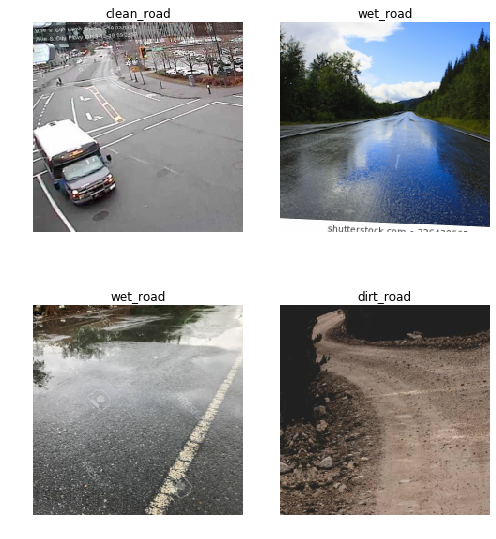

In [21]:
data.show_batch(rows=2, figsize=(7, 8))

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\MH9130/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100%|████████████████████████| 87306240/87306240 [00:03<00:00, 22290643.71it/s]


In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.661280,1.156538,0.518987,10:47
1,1.235277,0.529912,0.215190,09:08
2,0.966426,0.438303,0.151899,09:33
3,0.797083,0.427073,0.164557,08:54


In [ ]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()